# Decision tree classification

- Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, 
- Mostly it is preferred for solving classification problems. 

It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

## Importing and loading data

In [ ]:
!pip install scikit-learn==1.2.2

In [ ]:
!pip install imblearn

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

from sklearn import metrics 
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc

In [2]:
# Reading the data (Target Variable -> Exited)
churn_data = pd.read_csv('datasets/Customer_Churn.csv')

# Check the data
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Dropping uneccesary columns
churn_data = churn_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Check the data
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Print the shape of the data
churn_data.shape

(10000, 11)

In [5]:
# Checking for any NULL / NaN values
churn_data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Information about the data
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
# Checking the data
churn_data.describe().round(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.248,0.000
max,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


## Basic EDA and Statistics

In [8]:
# Checking the counts of the categorical variables
cat_cols = ['Geography', 'Gender', 'Exited']

for i in cat_cols:
    print('Value Counts of ' + str(i) + ':')
    print(churn_data[i].value_counts())
    print('-' * 40)

Value Counts of Geography:
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
----------------------------------------
Value Counts of Gender:
Gender
Male      5457
Female    4543
Name: count, dtype: int64
----------------------------------------
Value Counts of Exited:
Exited
0    7963
1    2037
Name: count, dtype: int64
----------------------------------------


In [9]:
# Checking the counts of the categorical variables
cat_cols = ['Geography', 'Gender', 'Exited']

for i in cat_cols:
    print('Value Counts of ' + str(i) + ':')
    print(churn_data[i].value_counts(normalize = True))
    print('-' * 40)

Value Counts of Geography:
Geography
France     0.5014
Germany    0.2509
Spain      0.2477
Name: proportion, dtype: float64
----------------------------------------
Value Counts of Gender:
Gender
Male      0.5457
Female    0.4543
Name: proportion, dtype: float64
----------------------------------------
Value Counts of Exited:
Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64
----------------------------------------


<Axes: xlabel='Balance', ylabel='Density'>

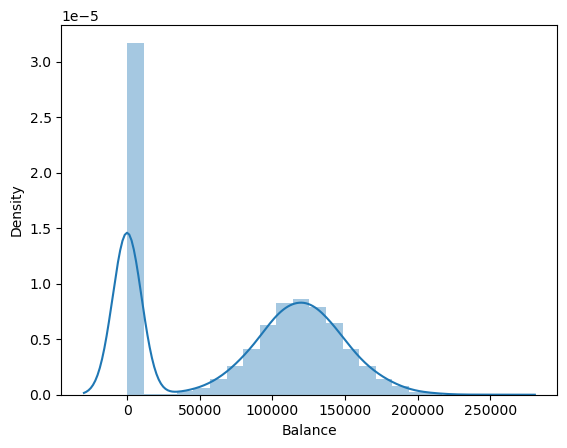

In [10]:
# Plotting graphs
sns.distplot(churn_data['Balance'], kde=True)

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

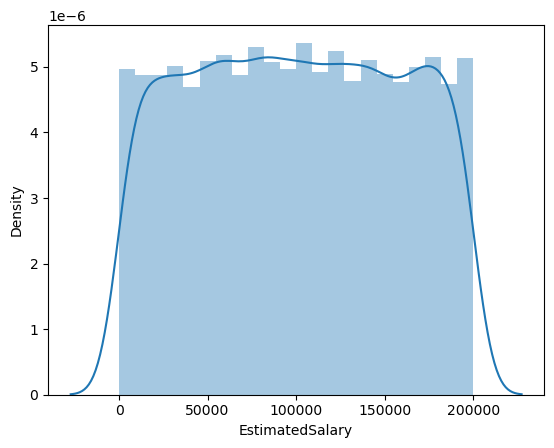

In [11]:
sns.distplot(churn_data['EstimatedSalary'], kde=True)

## Data Preprocessing

In [12]:
# Apply One Hot Encoding using get_dummies()
churn_data_encoded = pd.get_dummies(churn_data, drop_first=True)
churn_data_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [13]:
# Replace the boolean values to 0 and 1, or you can use dtype = int in the get_dummies() function
churn_data_encoded['Geography_Germany'] = churn_data_encoded['Geography_Germany'].replace({False: 0, True: 1})
churn_data_encoded['Geography_Spain'] = churn_data_encoded['Geography_Spain'].replace({False: 0, True: 1})
churn_data_encoded['Gender_Male'] = churn_data_encoded['Gender_Male'].replace({False: 0, True: 1})

In [14]:
# Numerical Columns for Data Normalization / Transformation
cnames = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
sc = StandardScaler()

# fit_transform used for fitting and transforming using the standardScalar
for col in cnames:
    churn_data_encoded[col] = sc.fit_transform(churn_data_encoded[col].values.reshape(-1,1))

# Check the data
churn_data_encoded.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,0,0,0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,1,0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,0,0,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,0,0,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,1,0


In [15]:
# Splitting the target and independent variables
X = churn_data_encoded.drop('Exited', axis = 1)
Y = churn_data_encoded['Exited']

### Handling class imbalance with the help of SMOTE

Class imbalance occurs when one class in the dataset has significantly fewer instances than the other class or classes. This can lead to biased models that perform poorly on the minority class. To handle this, Synthetic Minority Over-sampling Technique (SMOTE) comes into picture.
- **SMOTE** specifically focuses on the minority class and aims to balance the class distribution by generating synthetic examples. 

- The basic idea behind SMOTE is to create synthetic samples in feature space by interpolating between existing minority class instances.

In [16]:
churn_data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

You can observe that the dataset has **~8000 class '0' and ~ 2000 class '1'** values. This can hinder in the performance of the model. 

In [17]:
# Apply SMOTE
smot = SMOTE(random_state = 0)
smot_x, smot_y = smot.fit_resample(X, Y)
smot_x = pd.DataFrame(smot_x, columns = X.columns)
smot_y = pd.DataFrame(smot_y, columns = ['Exited'])

In [18]:
# Checking the counts
smot_y.value_counts()

Exited
0         7963
1         7963
Name: count, dtype: int64

## Model building

In [19]:
# Splitting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(smot_x, smot_y, test_size = 0.2, random_state = 10)

print(x_train.shape)
print(x_test.shape)

(12740, 11)
(3186, 11)


Here we are using a Decision Tree Classifier. **Decision Trees (DTs)** are a non-parametric supervised learning method used for classification and regression. 

The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

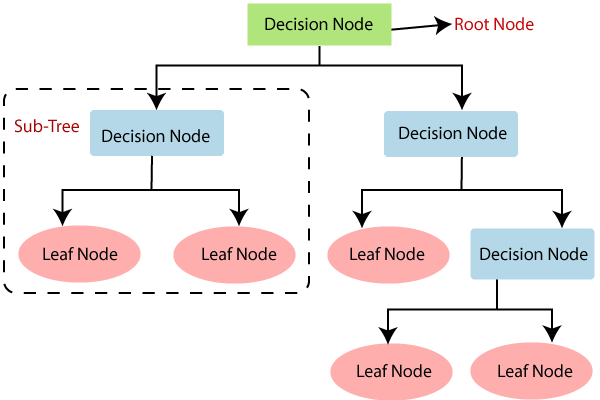

Some of the advantages of decision trees are: 
- Simple to understand and to interpret. Trees can be visualized.
- Requires little data preparation. Other techniques often require data normalization, dummy variables need to be created and blank values to be removed. Some tree and algorithm combinations support missing values.
- The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.

The disadvantages of decision trees include:
- Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.
- Predictions of decision trees are neither smooth nor continuous, but piecewise constant approximations. Therefore, they are not good at extrapolation.

### Base model: Using all the features

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Creating the clf object for DecisionTreeClassifier
# You can use criterion = 'gini' as well

clf = DecisionTreeClassifier(criterion = 'entropy')   
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [21]:
# Check the predictions
y_pred = clf.predict(x_test)

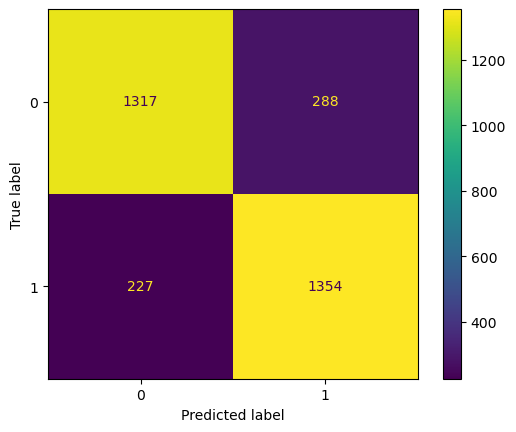

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

disp.plot()
plt.show()

In [23]:
# Calculate Accuracy, Precision, Recall and F1 Score

y_train_pred = clf.predict(x_train)
print('Training accuracy:', accuracy_score(y_train, y_train_pred).round(3))
print('Testing accuracy:', accuracy_score(y_test, y_pred).round(3))
print('Precision Score:', precision_score(y_test, y_pred).round(3))
print('Recall Score:', recall_score(y_test, y_pred).round(3))

pre = precision_score(y_test, y_pred).round(3)
rec = recall_score(y_test, y_pred).round(3)

f1_score = (2 * pre * rec)/(pre + rec)
print('F1-Score:', f1_score.round(3))

Training accuracy: 1.0
Testing accuracy: 0.838
Precision Score: 0.825
Recall Score: 0.856
F1-Score: 0.84


***Inference:*** Testing performance is much lower than the training performance, hence there is an overfit.

**Attribute Selection Measures**

The most popular selection measures are Information Gain, Gain Ratio, and Gini Index.

**1. Information Gain:** Information gain is the decrease in entropy. Information gain computes the difference between entropy before the split and average entropy after the split of the dataset based on given attribute values. **ID3 (Iterative Dichotomiser)** decision tree algorithm uses information gain.

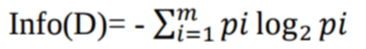

Where Pi is the probability that an arbitrary tuple in D belongs to class Ci.

#### Drawing Tree
 

In [24]:
# Printing the columns
cols = list(x_train.columns.values)
print(cols)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']


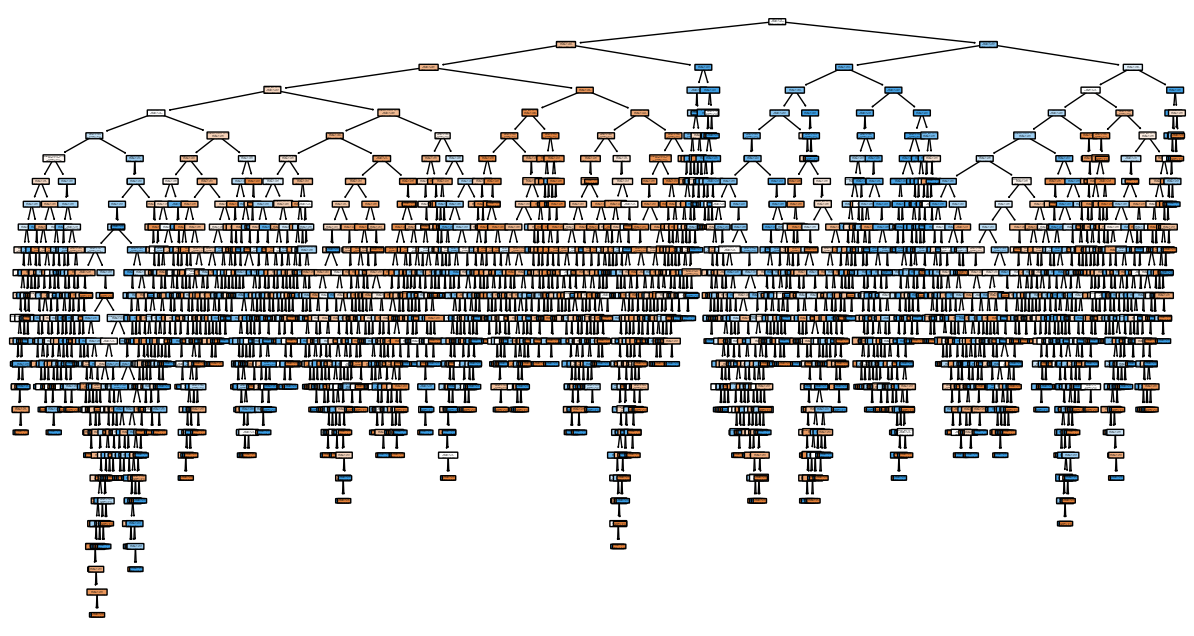

In [25]:
from sklearn import tree

# Plotting the tree
plt.figure(figsize=(15,8))
tree.plot_tree(clf, feature_names = cols, filled = True, precision = 3, proportion = True, rounded = True) 

plt.show()

In [26]:
# Display the tree rules
tree_rules = tree.export_text(clf,  feature_names = cols)
print(tree_rules)

|--- Age <= 0.20
|   |--- NumOfProducts <= 0.91
|   |   |--- NumOfProducts <= 0.76
|   |   |   |--- Gender_Male <= 0.50
|   |   |   |   |--- IsActiveMember <= 0.50
|   |   |   |   |   |--- Age <= -0.47
|   |   |   |   |   |   |--- Geography_Germany <= 0.50
|   |   |   |   |   |   |   |--- Balance <= -0.06
|   |   |   |   |   |   |   |   |--- Balance <= -1.19
|   |   |   |   |   |   |   |   |   |--- Age <= -0.65
|   |   |   |   |   |   |   |   |   |   |--- EstimatedSalary <= 1.28
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |   |--- EstimatedSalary >  1.28
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Age >  -0.65
|   |   |   |   |   |   |   |   |   |   |--- Age <= -0.47
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- Age >  -0.47
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch

In [27]:
# Which features are important for predictions? using feature_importances_ 
feat_imp = clf.feature_importances_
print(feat_imp)

[0.12155232 0.3013159  0.09026426 0.12650214 0.10861016 0.01454035
 0.05208122 0.12965557 0.01837593 0.01299991 0.02410223]


In [28]:
# Creating a dataframe to check the importance of every feature
pd.Series(feat_imp, index = cols).sort_values(ascending=False)

Age                  0.301316
EstimatedSalary      0.129656
Balance              0.126502
CreditScore          0.121552
NumOfProducts        0.108610
Tenure               0.090264
IsActiveMember       0.052081
Gender_Male          0.024102
Geography_Germany    0.018376
HasCrCard            0.014540
Geography_Spain      0.013000
dtype: float64

### Model using only most important features

In [29]:
# Dropping the unnecessary features from the dataset
new_df_train = x_train.drop(['Gender_Male', 'Geography_Germany', 'HasCrCard', 'Geography_Spain'], axis=1)
new_df_test = x_test.drop(['Gender_Male','Geography_Germany','HasCrCard', 'Geography_Spain'], axis=1)

In [30]:
# Creating a new DecisionTreeClassifier() object
# You can use criterion = 'gini' as well

dt = DecisionTreeClassifier(criterion = 'entropy')   
dt.fit(new_df_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [31]:
# Store the predictions
y_pred = dt.predict(new_df_test)

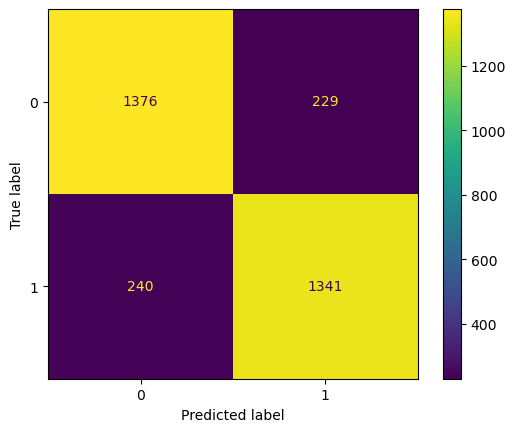

In [32]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels = dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dt.classes_)

disp.plot()
plt.show()

In [33]:
# Calculate Accuracy, Precision, Recall and F1 Score
y_train_pred = dt.predict(new_df_train)
print('Training accuracy:', accuracy_score(y_train, y_train_pred).round(3))
print('Testing accuracy:', accuracy_score(y_test, y_pred).round(3))
print('Precision Score:', precision_score(y_test, y_pred).round(3))
print('Recall Score:', recall_score(y_test, y_pred).round(3))

pre = precision_score(y_test, y_pred).round(3)
rec = recall_score(y_test, y_pred).round(3)

f1_score = (2 * pre * rec)/(pre + rec)
print('F1-Score:', f1_score.round(3))

Training accuracy: 1.0
Testing accuracy: 0.853
Precision Score: 0.854
Recall Score: 0.848
F1-Score: 0.851


In [34]:
# Printing the columns
cols = list(new_df_train.columns.values)
print(cols)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary']


In [35]:
# Which features are important for predictions? using feature_importances_ 
feat_imp = dt.feature_importances_
print(feat_imp)

[0.13260673 0.37732393 0.09432725 0.11449378 0.10815488 0.04905506
 0.12403836]


In [36]:
# Creating a dataframe to check the importance of every feature
pd.Series(feat_imp, index = cols).sort_values(ascending=False)

Age                0.377324
CreditScore        0.132607
EstimatedSalary    0.124038
Balance            0.114494
NumOfProducts      0.108155
Tenure             0.094327
IsActiveMember     0.049055
dtype: float64

In [37]:
# Display the tree rules
tree_rules = tree.export_text(dt,  feature_names = cols)
print(tree_rules)

|--- Age <= 0.20
|   |--- NumOfProducts <= 0.91
|   |   |--- NumOfProducts <= 0.76
|   |   |   |--- IsActiveMember <= 0.50
|   |   |   |   |--- Age <= -0.47
|   |   |   |   |   |--- Age <= -0.47
|   |   |   |   |   |   |--- Age <= -0.56
|   |   |   |   |   |   |   |--- Age <= -0.57
|   |   |   |   |   |   |   |   |--- Age <= -0.66
|   |   |   |   |   |   |   |   |   |--- Age <= -0.66
|   |   |   |   |   |   |   |   |   |   |--- Age <= -0.75
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 17
|   |   |   |   |   |   |   |   |   |   |--- Age >  -0.75
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- Age >  -0.66
|   |   |   |   |   |   |   |   |   |   |--- EstimatedSalary <= 1.53
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |   |--- EstimatedSalary >  1.53
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |  

### Pruning: Also called as hyperparameter tuning

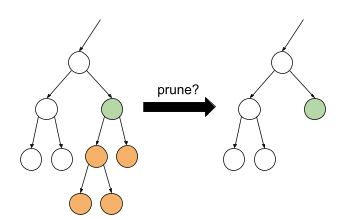

- Pruning helps us to avoid overfitting
    - Generally it is preferred to have a simple model, it avoids overfitting issue
    - Any additional split that does not add significant value is not worth while.
- We can avoid overfitting by changing the pruning parameters like
    - **max_leaf_nodes**: 
        - Indicates the maximum number of leaf nodes a tree can have.
        - Allows to reduces the number of leaf nodes and hence pruning the tree
    - **min_samples_leaf**:
        - Indicates the minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model. The default value is 1.
        - For pruning, restrict the size of sample leaf
        - Minimum sample size in terminal nodes can be fixed to 30, 100, 300 or 5% of total
    - **max_depth**:
        - Indicates the maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. 
        - For pruning, reduce the depth of the tree to build a generalized tree
        - Set the depth of the tree to 3, 5, 10 depending after verification on test data

In [38]:
'''
The parameter splitter indicates the strategy used to choose the split at each node. Supported strategies are “best” to choose the best split 
and “random” to choose the best random split. splitter = 'random'
'''

# Training a classifier with pruning
clf1 = DecisionTreeClassifier(criterion = "entropy" , splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 20, max_depth = 4)

clf1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=10,
                       min_samples_leaf=20, splitter='random')

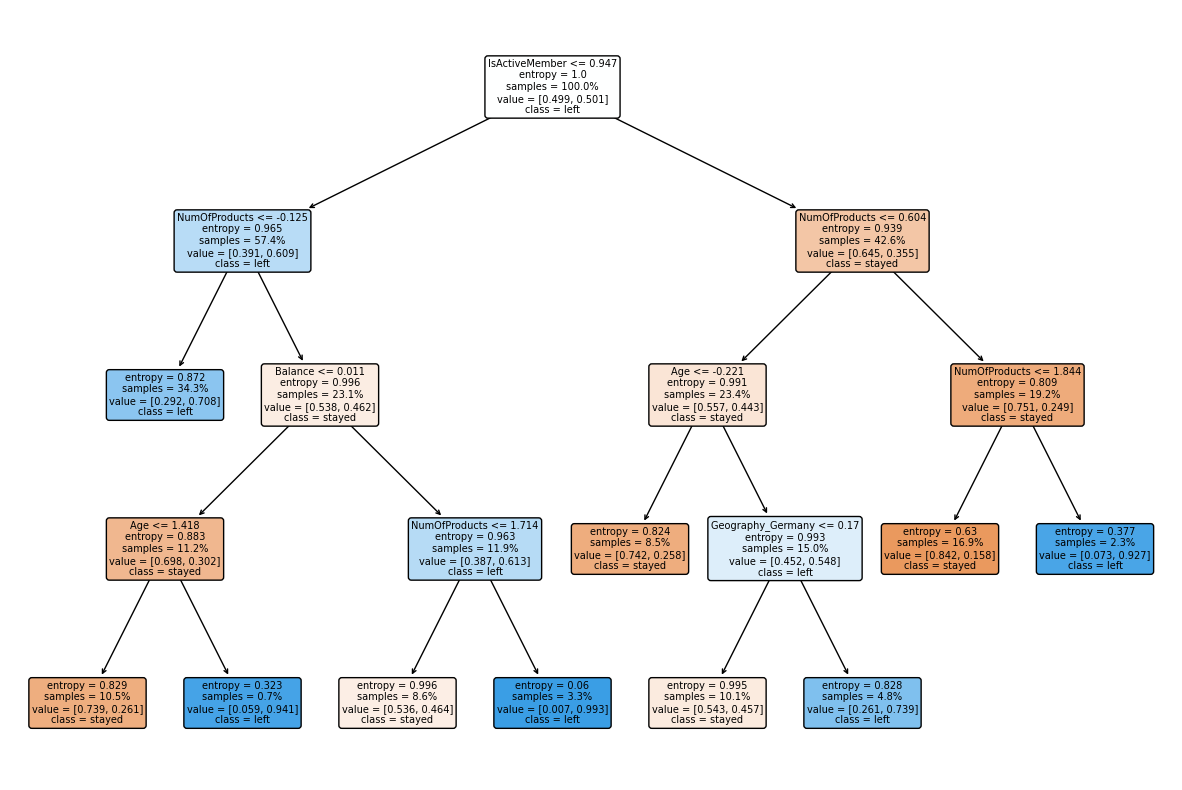

In [39]:
# Plotting the figure
plt.figure(figsize=(15,10))

cols = list(x_train.columns.values)
tree.plot_tree(clf1,feature_names=cols,filled=True,precision=3,proportion=True,rounded=True,class_names = ['stayed', 'left']) 

plt.show()

In [40]:
# Display the tree rules
tree_rules = tree.export_text(clf1,  feature_names = cols)
print(tree_rules)

|--- IsActiveMember <= 0.95
|   |--- NumOfProducts <= -0.13
|   |   |--- class: 1
|   |--- NumOfProducts >  -0.13
|   |   |--- Balance <= 0.01
|   |   |   |--- Age <= 1.42
|   |   |   |   |--- class: 0
|   |   |   |--- Age >  1.42
|   |   |   |   |--- class: 1
|   |   |--- Balance >  0.01
|   |   |   |--- NumOfProducts <= 1.71
|   |   |   |   |--- class: 0
|   |   |   |--- NumOfProducts >  1.71
|   |   |   |   |--- class: 1
|--- IsActiveMember >  0.95
|   |--- NumOfProducts <= 0.60
|   |   |--- Age <= -0.22
|   |   |   |--- class: 0
|   |   |--- Age >  -0.22
|   |   |   |--- Geography_Germany <= 0.17
|   |   |   |   |--- class: 0
|   |   |   |--- Geography_Germany >  0.17
|   |   |   |   |--- class: 1
|   |--- NumOfProducts >  0.60
|   |   |--- NumOfProducts <= 1.84
|   |   |   |--- class: 0
|   |   |--- NumOfProducts >  1.84
|   |   |   |--- class: 1



In [43]:
# Store the predictions
y_pred_clf1 = clf1.predict(x_test)

In [44]:
# Calculate Accuracy, Precision, Recall and F1 Score
y_train_pred = clf1.predict(x_train)

print('Training accuracy:', accuracy_score(y_train, y_train_pred).round(3))
print('Testing accuracy:', accuracy_score(y_test, y_pred_clf1).round(3))
print('Precision Score:', precision_score(y_test, y_pred_clf1).round(3))
print('Recall Score:', recall_score(y_test, y_pred_clf1).round(3))

pre = precision_score(y_test, y_pred_clf1).round(3)
rec = recall_score(y_test, y_pred_clf1).round(3)

f1_score = (2 * pre * rec)/(pre + rec)
print('F1-Score:', f1_score.round(3))

Training accuracy: 0.723
Testing accuracy: 0.736
Precision Score: 0.749
Recall Score: 0.702
F1-Score: 0.725


In [45]:
# Calculating the important features
feat_imp = clf1.feature_importances_
print(feat_imp)

pd.Series(feat_imp,index=cols).sort_values(ascending=False)

[0.         0.11657924 0.         0.08293547 0.53037821 0.
 0.23067823 0.         0.03942884 0.         0.        ]


NumOfProducts        0.530378
IsActiveMember       0.230678
Age                  0.116579
Balance              0.082935
Geography_Germany    0.039429
CreditScore          0.000000
Tenure               0.000000
HasCrCard            0.000000
EstimatedSalary      0.000000
Geography_Spain      0.000000
Gender_Male          0.000000
dtype: float64

In [46]:
probs = clf1.predict_proba(x_test)
probs

array([[0.74187558, 0.25812442],
       [0.73880597, 0.26119403],
       [0.29231473, 0.70768527],
       ...,
       [0.29231473, 0.70768527],
       [0.84191006, 0.15808994],
       [0.00704225, 0.99295775]])

In [48]:
prob_positive = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print('Area under the curve:',roc_auc.round(3))

Area under the curve: 0.785


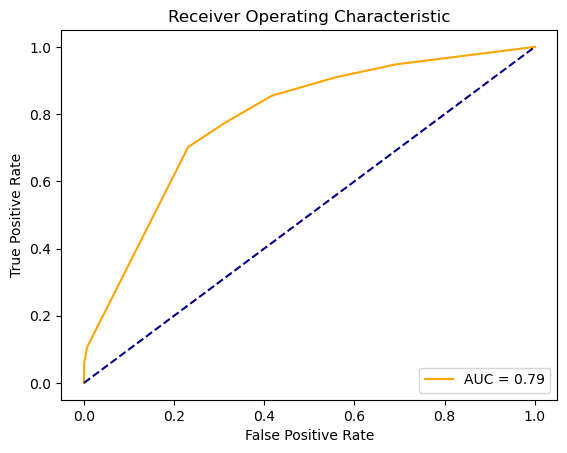

In [49]:
# Plot the AUC-ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
print(metrics.classification_report(y_test, y_pred_clf1))

              precision    recall  f1-score   support

           0       0.72      0.77      0.75      1605
           1       0.75      0.70      0.73      1581

    accuracy                           0.74      3186
   macro avg       0.74      0.74      0.74      3186
weighted avg       0.74      0.74      0.74      3186



### GridSearchCV algorithm for choosing best parameters (Hyperparameter Selection)

GridSearchCV implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used. 

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [51]:
from sklearn.model_selection import GridSearchCV

# Perform GridSearchCV for the best hyperparameters
mod = GridSearchCV(clf1, param_grid = {'max_depth':[i for i in range(3,10)], 
                                 'max_leaf_nodes':[i for i in range(5,15)],
                                 'min_samples_leaf':[i for i in range(10,200,5)]
                                })

mod.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                              max_leaf_nodes=10,
                                              min_samples_leaf=20,
                                              splitter='random'),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'max_leaf_nodes': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'min_samples_leaf': [10, 15, 20, 25, 30, 35, 40, 45,
                                              50, 55, 60, 65, 70, 75, 80, 85,
                                              90, 95, 100, 105, 110, 115, 120,
                                              125, 130, 135, 140, 145, 150, 155, ...]})

In [52]:
# Check the best estimator
mod.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=14,
                       min_samples_leaf=135, splitter='random')

In [54]:
# Check the best score
mod.best_score_ .round(3)

0.759

In [56]:
# Calculate Accuracy, Precision, Recall and F1 Score

y_train_pred = mod.predict(x_train)
y_test_pred = mod.predict(x_test)

print('Training accuracy:', accuracy_score(y_train, y_train_pred).round(3))
print('Testing accuracy:', accuracy_score(y_test, y_test_pred).round(3))
print('Precision Score:', precision_score(y_test, y_test_pred).round(3))
print('Recall Score:', recall_score(y_test, y_test_pred).round(3))

pre = precision_score(y_test, y_test_pred).round(3)
rec = recall_score(y_test, y_test_pred).round(3)

f1_score = (2 * pre * rec)/(pre + rec)
print('F1-Score:', f1_score.round(3))

Training accuracy: 0.734
Testing accuracy: 0.747
Precision Score: 0.71
Recall Score: 0.829
F1-Score: 0.765


In [57]:
probs = mod.predict_proba(x_test)
prob_positive = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print('Area under the curve:', roc_auc.round(3))

Area under the curve: 0.825


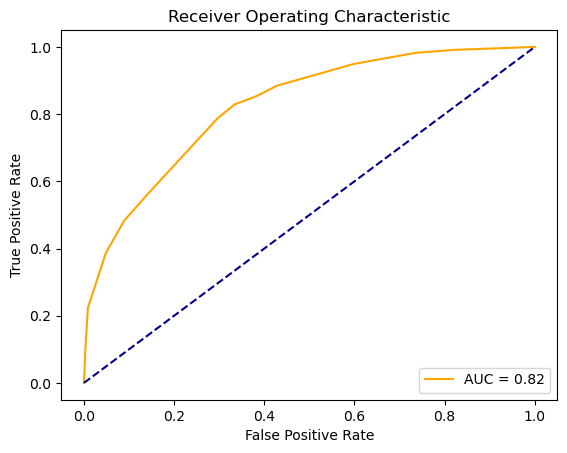

In [58]:
# Plot AUC-ROC curve
plt.title('Receiver Operating Characteristic')

plt.plot(fpr, tpr, 'orange', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()